In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os 

In [2]:
import os
import cv2
import numpy as np
from PIL import Image

def load_images_from_directory(root_dir, target_size=(128, 128)):
    images = []
    labels = []
    class_dirs = sorted(os.listdir(root_dir))
    for class_idx, class_dir in enumerate(class_dirs):
        class_path = os.path.join(root_dir, class_dir)
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, target_size)
            images.append(image)
            labels.append(class_idx)  # Assign label based on directory index
    return np.array(images), np.array(labels)

# Example usage
root_dir = './Training/'  # Replace this with your dataset directory
x_train, y_train = load_images_from_directory(root_dir)

In [3]:
model = tf.keras.models.load_model('saved_models/model_1.keras')

In [4]:
for layer in model.layers:
    print(layer.name)

rescaling_1
conv2d_3
max_pooling2d_3
conv2d_4
max_pooling2d_4
conv2d_5
max_pooling2d_5
flatten_1
dense_2
dense_3


In [6]:
num_samples = len(x_train)

# Generate shuffled indices
shuffled_indices = np.random.permutation(num_samples)

# Use shuffled indices to shuffle both X_test and y_test
x_train_shuffled = x_train[shuffled_indices]
y_train_shuffled = y_train[shuffled_indices]

In [115]:
 target_layer = model.get_layer('conv2d_4')

In [116]:
 activation_model = tf.keras.models.Model(inputs=model.input, outputs=target_layer.output)

In [117]:
for layer in activation_model.layers:
    print(layer.name)

rescaling_1_input
rescaling_1
conv2d_3
max_pooling2d_3
conv2d_4


In [118]:
activation_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1_input (InputLa  [(None, 128, 128, 3)]     0         
 yer)                                                            
                                                                 
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
Total params: 19392 (75.75 KB)
Trainable params: 19392 (75.

In [125]:
low, high = 19, 20

In [126]:
activations_list = []
# activation_model.layers[-1].activation = False

inputs = x_train_shuffled[low : high]
activations = activation_model.predict(inputs)
activations_list.extend(activations)

1/1 [==============================] - 0s 184ms/step


In [127]:
# Determine the size of activations_list
num_batches = len(activations_list)  # Number of batches processed
batch_size = activations_list[0].shape[0] if activations_list else 0  # Batch size of each batch
num_samples = num_batches * batch_size  # Total number of samples
num_filters = activations_list[0].shape[-1] if activations_list else 0  # Number of filters in the layer

print("Size of activations_list:")
print(f"Number of batches: {num_batches}")
print(f"Batch size: {batch_size}")
print(f"Total number of samples: {num_samples}")
print(f"Number of filters in the layer: {num_filters}")

Size of activations_list:
Number of batches: 1
Batch size: 61
Total number of samples: 61
Number of filters in the layer: 64


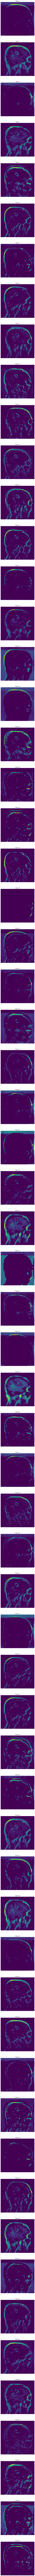

In [122]:
num_samples_to_visualize = 1 # Number of samples to visualize
for i in range(num_samples_to_visualize):
    sample_activations = activations_list[i]  # Get activations for a sample
    num_filters = sample_activations.shape[-1]  # Number of filters in the layer
    plt.figure(figsize=(500, 500))  # Larger figure size
    for j in range(num_filters):
        plt.subplot(num_filters, 1, j+1)
        plt.imshow(sample_activations[:, :, j])  # Plot the activation map of each filter
        plt.axis('off')
        plt.title(f'Filter {j+1}')
    plt.show()

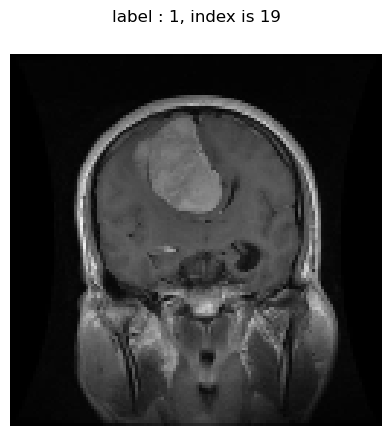

In [128]:
for i in range(low, high):
    plt.matshow(x_train_shuffled[i])
    plt.title(f'label : {y_train_shuffled[i]}, index is {i}')
    plt.axis('off')

In [103]:
tf.argmax(model.predict(x_train_shuffled[low:high]), axis=1).numpy()[0]

1/1 [==============================] - 0s 22ms/step


0

2nd maxpool filter 35 : )

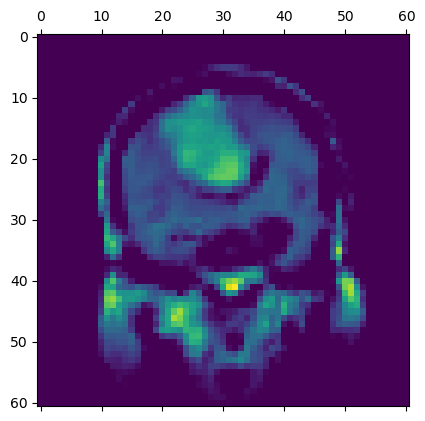

In [129]:
plt.matshow(activations_list[0][:, :, 34])